       carat  cut  color  clarity  depth  table     x     y     z  price   predictions
46519   0.51    2      3        4   62.7   54.0  5.10  5.08  3.19   1781   1700.365148
8639    1.06    3      5        2   61.9   59.0  6.52  6.50  4.03   4452   4454.261777
23029   0.33    2      3        2   61.3   56.0  4.51  4.46  2.75    631    627.135161
51641   0.31    1      3        5   63.1   58.0  4.30  4.35  2.73    544    689.175700
25789   2.04    3      5        2   58.8   60.0  8.42  8.32  4.92  14775  15430.225174
6639    0.85    2      1        2   63.0   56.0  6.00  6.04  3.79   4089   3522.345815
3779    1.06    2      2        3   62.7   56.0  6.52  6.47  4.07   3461   4359.462214
28857   0.41    2      1        3   61.9   57.0  4.76  4.80  2.96    683    724.411801
16807   1.20    4      1        2   61.0   59.0  6.91  6.83  4.19   6703   6741.014744
35980   0.42    3      3        4   60.8   59.0  4.79  4.85  2.93    921    994.899111
51058   0.71    3      2        3   60.2   

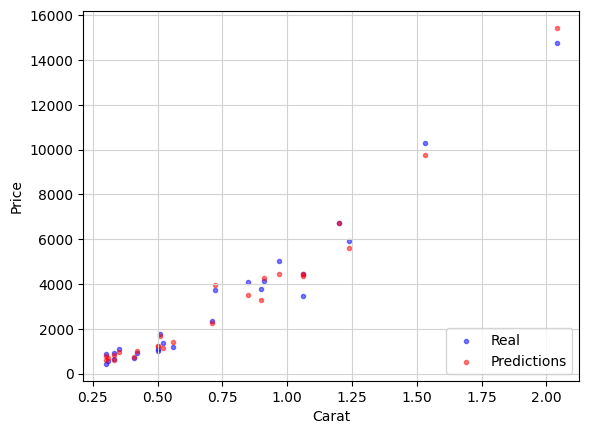

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('P1_diamonds.csv')

# print(df.head(10).to_string())

# deleting Unnamed column(axis = 1 - column is deleted)
df = df.drop(['Unnamed: 0'], axis=1)

# creating variable for categories
categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()

# changing categories at numeric values
for i in range(3):
    new = le.fit_transform(df[categorical_features[i]])
    df[categorical_features[i]] = new

# print(df.head(10).to_string())

x = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df[['price']]

# dividing data for test and training packs
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=25, random_state=101)

# training
regr = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=101)
regr.fit(X_train, y_train.values.ravel())

# prognosing
predictions = regr.predict(X_test)

result = X_test
result['price'] = y_test
result['predictions'] = predictions.tolist()

print(result.to_string())

# axis-X determine
x_axis = X_test.carat

# plotting
plt.scatter(x_axis, y_test, c='b', alpha=0.5, marker='.', label='Real')
plt.scatter(x_axis, predictions, c='r', alpha=0.5, marker='.', label='Predictions')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color='#D3D3D3')
plt.legend(loc='lower right')
plt.show()
